In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DatetimeIndex
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
def mergeData(df):
    features = pd.read_csv('features.csv')
    stores =  pd.read_csv('stores.csv')
    df = pd.merge(df,features,on=['Store','Date','IsHoliday'],how='inner')
    df = pd.merge(df,stores,on=['Store'],how = 'inner')
    return df


In [3]:
merge_df = mergeData(pd.read_csv('train.csv'))

In [4]:
merge_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [5]:
%matplotlib inline

In [6]:
def scatterplot(dataset,label):
    plt.figure()
    y=dataset['Weekly_Sales']
    x = dataset[label]
    plt.scatter(x,y)
    #plt.xlabel(label)
    #plt.ylabel(Weekly_Sales)
    plt.show()
    

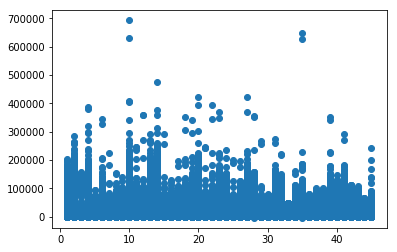

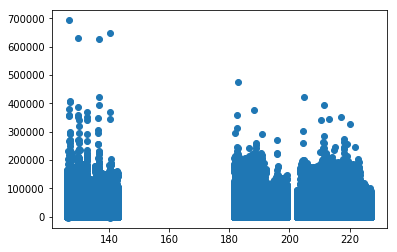

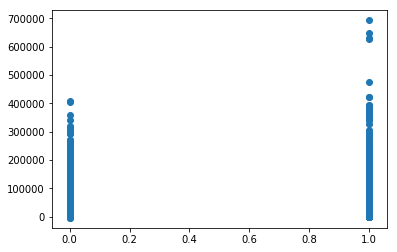

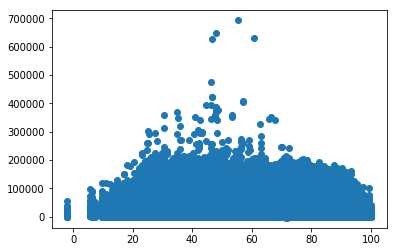

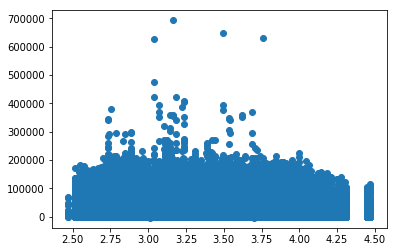

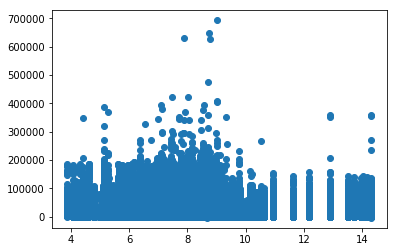

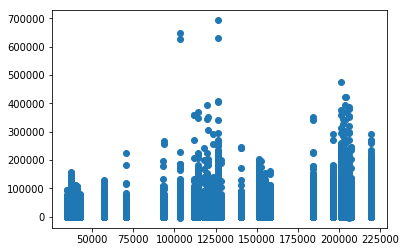

In [7]:
scatterplot(merge_df,'Store')
scatterplot(merge_df,'CPI')
scatterplot(merge_df,'IsHoliday')
scatterplot(merge_df,'Temperature')
scatterplot(merge_df,'Fuel_Price')
scatterplot(merge_df,'Unemployment')
scatterplot(merge_df,'Size')


In [8]:
merge_df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [9]:
merge_df.loc[merge_df['Weekly_Sales'] >350000,"Date"].value_counts()

2010-11-26    11
2011-11-25     9
2010-12-24     3
Name: Date, dtype: int64

In [10]:
merge_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [11]:
merge_df['Markdown']=merge_df['MarkDown1']+merge_df['MarkDown2']+merge_df['MarkDown3']+merge_df['MarkDown4']+merge_df['MarkDown5']

In [12]:
columns_drop= ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
merge_df.drop(columns_drop,axis=1,inplace=True)

In [13]:
merge_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Markdown
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,NaN
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,A,151315,NaN
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,A,151315,NaN
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,A,151315,NaN
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,A,151315,NaN


In [14]:
merge_df.drop('Type',axis=1,inplace=True)

In [15]:
merge_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Markdown
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,151315,NaN
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,151315,NaN
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,151315,NaN
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,151315,NaN
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,151315,NaN


In [16]:
merge_df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Size              int64
Markdown        float64
dtype: object

In [17]:
merge_df.fillna(0,inplace=True)

In [18]:
merge_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Markdown
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,151315,0.0
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,151315,0.0
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,151315,0.0
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,151315,0.0
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,151315,0.0


In [19]:
df = merge_df
df.Date = pd.to_datetime(df.Date)
print(df.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     2 2010-02-05      50605.27      False        42.31       2.572   
2      1     3 2010-02-05      13740.12      False        42.31       2.572   
3      1     4 2010-02-05      39954.04      False        42.31       2.572   
4      1     5 2010-02-05      32229.38      False        42.31       2.572   

          CPI  Unemployment    Size  Markdown  
0  211.096358         8.106  151315       0.0  
1  211.096358         8.106  151315       0.0  
2  211.096358         8.106  151315       0.0  
3  211.096358         8.106  151315       0.0  
4  211.096358         8.106  151315       0.0  


In [20]:
df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Size                     int64
Markdown               float64
dtype: object

In [21]:
df['Year'] = DatetimeIndex(df['Date']).year
df['Month']= DatetimeIndex(df['Date']).month
df['Day'] = DatetimeIndex(df['Date']).day
df = df.drop(columns=['Date'])

In [24]:
df.head()
df.to_csv('merged-train-data_reg.csv', index = False)

In [23]:
df.corr()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Markdown,Year,Month,Day
Store,1.000000,0.024004,-0.085195,-0.000548,-0.050097,0.065290,-0.211088,0.208552,-0.182881,-0.056783,0.002997,0.001011,-0.000015
Dept,0.024004,1.000000,0.148032,0.000916,0.004437,0.003572,-0.007477,0.007837,-0.002966,0.002669,0.003738,0.000904,-0.000678
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,-0.002312,-0.000120,-0.020921,-0.025864,0.243828,0.062454,-0.010111,0.028409,-0.006187
IsHoliday,-0.000548,0.000916,0.012774,1.000000,-0.155949,-0.078281,-0.001944,0.010460,0.000593,0.179489,-0.056746,0.123376,0.045465
Temperature,-0.050097,0.004437,-0.002312,-0.155949,1.000000,0.143859,0.182112,0.096730,-0.058313,-0.125597,0.065814,0.235983,0.026832
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.143859,1.000000,-0.164210,-0.033853,0.003361,0.175809,0.779633,-0.040876,0.028058
CPI,-0.211088,-0.007477,-0.020921,-0.001944,0.182112,-0.164210,1.000000,-0.299953,-0.003314,0.020286,0.074544,0.005282,0.002744
Unemployment,0.208552,0.007837,-0.025864,0.010460,0.096730,-0.033853,-0.299953,1.000000,-0.068238,-0.094771,-0.237161,-0.012444,-0.003793
Size,-0.182881,-0.002966,0.243828,0.000593,-0.058313,0.003361,-0.003314,-0.068238,1.000000,0.185082,-0.004975,-0.001210,-0.000386
Markdown,-0.056783,0.002669,0.062454,0.179489,-0.125597,0.175809,0.020286,-0.094771,0.185082,1.000000,0.368184,-0.018134,-0.053265


In [25]:
y = df['Weekly_Sales']
X= df.drop(columns=['Weekly_Sales'])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(X_train.head())

(295099, 12)
(126471, 12)
(295099,)
        Store  Dept  IsHoliday  Temperature  Fuel_Price         CPI  \
154115     16    98      False        31.73       3.479  195.718471   
238177     25    81      False        57.17       2.958  203.877024   
407348     44    91      False        23.35       2.974  127.719581   
6325        1    28      False        71.74       3.274  217.355273   
132096     14    22      False        45.01       3.582  184.613419   

        Unemployment    Size  Markdown  Year  Month  Day  
154115         6.232   57197   7502.89  2011     11   18  
238177         7.856  128107      0.00  2010      5   21  
407348         7.224   39910      0.00  2011      2    4  
6325           7.866  151315      0.00  2011     10   14  
132096         8.549  200898      0.00  2011      3   11  


In [28]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
print("Intercept: ", model.intercept_)

print("Coefficient: " , model.coef_)

Intercept:  1046159.8711576685
Coefficient:  [-8.77213564e+01  1.10847319e+02  7.51387060e+02  1.94210282e+01
  2.01709208e+02 -2.11847029e+01 -1.80446619e+02  8.61913916e-02
  3.19592992e-02 -5.18447849e+02  1.37871874e+02 -1.66192971e+01]


In [92]:
X.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Markdown,Year,Month,Day
0,1,1,False,42.31,2.572,211.096358,8.106,151315,0.0,2010,2,5
1,1,2,False,42.31,2.572,211.096358,8.106,151315,0.0,2010,2,5
2,1,3,False,42.31,2.572,211.096358,8.106,151315,0.0,2010,2,5
3,1,4,False,42.31,2.572,211.096358,8.106,151315,0.0,2010,2,5
4,1,5,False,42.31,2.572,211.096358,8.106,151315,0.0,2010,2,5


In [30]:
y_pred = model.predict(X_test)

In [31]:
print(y_pred)

[11118.59746656 22127.58210616 18210.29615663 ...  5014.81545927
 17281.68699519 18735.92791498]


In [32]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [33]:
print(rmse)

21834.241709459096


In [34]:
score_dt = model.score(X_test, y_test)
print(score_dt*100,'%')

8.559346625424102 %
